In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Завантаження даних
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
column_names = ['Frequency', 'AngleAttack', 'ChordLength', 'FreeStreamVelocity', 'SuctionSideDisplacementThickness', 'SoundPressureLevel']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

# 2. Підготовка даних
X = data.drop('SoundPressureLevel', axis=1)
y = data['SoundPressureLevel']

# Стандартизуємо ознаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділяємо на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Побудова нейронної мережі
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Вихід один, бо це регресія
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Навчання моделі
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# 5. Оцінка
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae:.2f}')

<ipython-input-3-3066b3c39ddc>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 15575.1113 - mae: 124.6211 - val_loss: 15167.1279 - val_mae: 122.9649
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14950.1602 - mae: 122.0670 - val_loss: 14003.8281 - val_mae: 118.0812
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13456.7676 - mae: 115.6996 - val_loss: 11649.8779 - val_mae: 107.4198
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10843.8926 - mae: 103.4322 - val_loss: 8052.7109 - val_mae: 88.3324
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7031.5181 - mae: 81.8995 - val_loss: 4203.4116 - val_mae: 61.1128
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3339.4111 - mae: 53.3146 - val_loss: 1720.5524 - val_mae: 36.9757
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1303.3258 - mae: 30.9957 - val_loss: 871.8537 - val_mae: 24.4468
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 710.3904 - mae: 22.2697 - val_loss: 644.6600 - val_mae: 20.6399


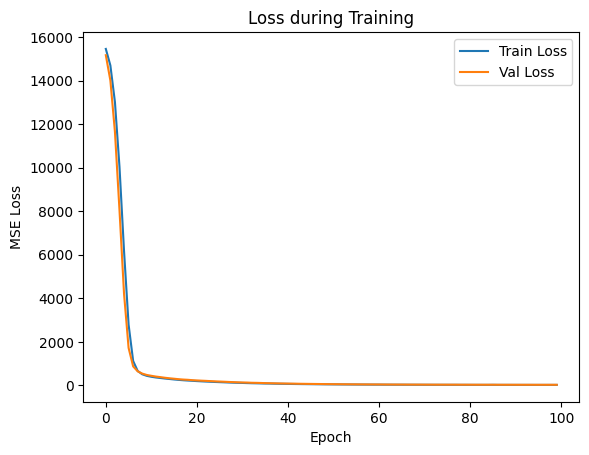

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss during Training')
plt.show()

## Пояснення:
StandardScaler — приводить усі ознаки до одного масштабу.

MSE (Mean Squared Error) — функція втрат для регресії.

MAE (Mean Absolute Error) — середня абсолютна похибка, простіша для інтерпретації.

Модель має два прихованих шари по 64 нейрони з активацією relu.

Тренування проходить 100 епох з міні-пакетами по 32 зразки.

## Що таке навчання нейронної мережі?
Навчання — це процес підбору ваг мережі так, щоб помилка передбачення була якомога меншою.
Для цього:

- Ми обчислюємо передбачення (y_pred) моделі.

- Вимірюємо помилку (різницю між справжнім і передбаченим рівнем шуму).

- Оновлюємо ваги через метод зворотного поширення похибки (backpropagation), використовуючи оптимізатор (adam).

- Мета — мінімізувати функцію втрат, у нашому випадку MSE (середньоквадратичну помилку).

## Що таке стандартизація даних і чому вона потрібна?
Стандартизація — це перетворення даних так, щоб кожна ознака мала середнє 0 і стандартне відхилення 1.
Це потрібно для того, щоб:

- Модель швидше і стабільніше навчалась.

- Жодна ознака не домінувала через свої великі значення.

## Що таке регуляризація і навіщо вона потрібна?
Регуляризація — це набір методів, які допомагають уникнути переобучення (overfitting) моделі.

Переобучення — коли модель ідеально запам'ятовує тренувальні дані, але погано працює на нових прикладах.

Методи регуляризації:

L2-регуляризація (вагова штрафна функція) — додає штраф за занадто великі ваги.

Dropout — випадкове вимикання частини нейронів під час навчання.

## Що таке Dropout?
Dropout — це техніка, коли під час навчання випадковим чином "вимикається" певний відсоток нейронів.
Це змушує мережу не залежати від окремих нейронів і робить її більш стійкою до переобучення.

In [5]:
from tensorflow.keras import regularizers

# Побудова покращеної нейронної мережі
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),  # 30% нейронів вимикаються на тренуванні
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Навчання моделі
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32, verbose=1)

#  Оцінка
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error after regularization and Dropout: {mae:.2f}')


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 15502.8096 - mae: 124.3125 - val_loss: 14823.6924 - val_mae: 121.5472
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14470.7676 - mae: 120.0544 - val_loss: 12902.8350 - val_mae: 113.2621
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12047.0918 - mae: 109.2772 - val_loss: 9125.3477 - val_mae: 94.6567
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8027.9478 - mae: 88.0354 - val_loss: 4297.9717 - val_mae: 62.4946
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3506.8787 - mae: 54.9223 - val_loss: 1245.3704 - val_mae: 30.9247
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1137.6133 - mae: 28.7360 - val_loss: 579.8517 - val_mae: 19.7312
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 782.8420 - mae: 22.6961 - val_loss: 469.8228 - val_mae: 17.7157
Epoch 8/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 694.2694 - mae: 21.3327 - val_loss: 409.1681 - val_mae: 16.4332
Epoch 

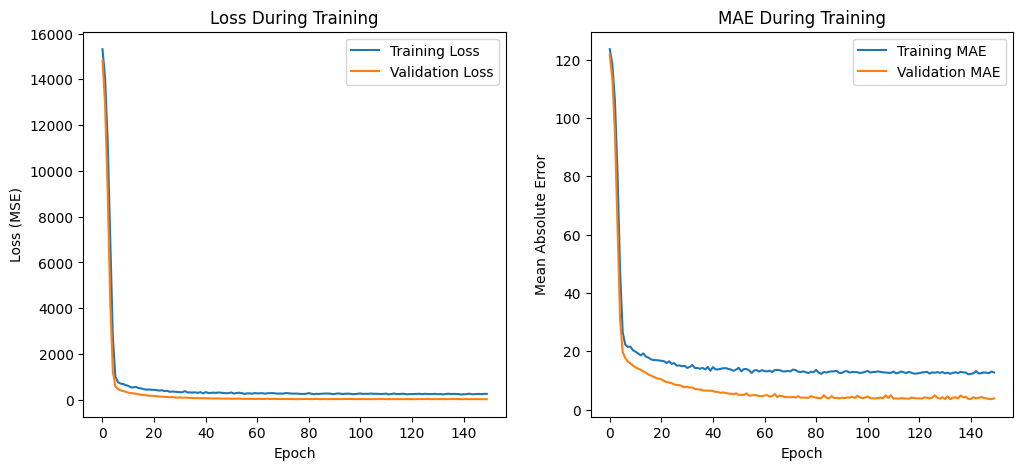

In [6]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    # mae
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()

    plt.show()

# Виклик функції після навчання моделі
plot_training_history(history)